# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "..\output_data\cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

In [20]:
cities.jcount

['arraial do cabo',
 'punta arenas',
 'san quintin',
 'port alfred',
 'mamallapuram',
 'tsihombe',
 'ushuaia',
 'cape town',
 'tiksi',
 'houma',
 'vaitupu',
 'lompoc',
 'roma',
 'manjeri',
 'dwarka',
 'airai',
 'bengkulu',
 'butaritari',
 'lorengau',
 'luderitz',
 'kodiak',
 'rikitea',
 'taolanaro',
 'hobart',
 'deputatskiy',
 'aksu',
 'north battleford',
 'dolbeau',
 'weihai',
 'new norfolk',
 'pisco',
 'ancud',
 'busselton',
 'mys shmidta',
 'basco',
 'sorong',
 'jamestown',
 'temaraia',
 'cabo san lucas',
 'berlevag',
 'iqaluit',
 'puno',
 'hualmay',
 'cruzeiro do sul',
 'chokurdakh',
 'karlsruhe',
 'attawapiskat',
 'hithadhoo',
 'puerto ayora',
 'sola',
 'bluff',
 'leningradskiy',
 'zanjan',
 'mataura',
 'saskylakh',
 'lakes entrance',
 'phek',
 'lisakovsk',
 'victoria',
 'avarua',
 'belushya guba',
 'kishi',
 'barrow',
 'hasaki',
 'aklavik',
 'norman wells',
 'savino',
 'kaitangata',
 'katsuura',
 'zemio',
 'qaanaaq',
 'tilichiki',
 'bandarbeyla',
 'burla',
 'palmer',
 'marinette'

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "albany"

# Build query URL
query_url = url + "appid=" + api_key + "&q=" + city

query_url



'http://api.openweathermap.org/data/2.5/weather?appid=eef71531d456946f9a155d172685f107&q=albany'

In [5]:

weather_response = requests.get(query_url)
weather_json = weather_response.json()
weather_json


{'coord': {'lon': -73.75, 'lat': 42.65},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 291.13,
  'pressure': 1012,
  'humidity': 45,
  'temp_min': 287.15,
  'temp_max': 294.26},
 'visibility': 16093,
 'wind': {'speed': 5.1, 'deg': 300},
 'clouds': {'all': 75},
 'dt': 1571086878,
 'sys': {'type': 1,
  'id': 3273,
  'country': 'US',
  'sunrise': 1571051188,
  'sunset': 1571091318},
 'timezone': -14400,
 'id': 5106834,
 'name': 'Albany',
 'cod': 200}

In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={api_key}&units={units}&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=eef71531d456946f9a155d172685f107&units=metric&q='

In [7]:
#loop to all cities to extract data
longitude=[]
lat = []
temp = []
humidity = []
windspeed = []
cloudiness = []
date=[]
countries=[]
final_cities = []
# Loop through the list of cities and perform a request for data on each
for index,city in enumerate(cities[:600]):
   try:
       response = requests.get(query_url + city).json()
       longitude.append(response["coord"]["lon"])
       lat.append(response["coord"]["lat"])
       temp.append(response["main"]["temp_max"])
       humidity.append(response["main"]["humidity"])
       windspeed.append(response["wind"]["speed"])
       cloudiness.append(response["clouds"]["all"])
       date.append(response["dt"])
       countries.append(response["sys"]["country"])
       final_cities.append(city)
       print("city number is: " +str(index)+ ","" city name is : " +city )
       time.sleep(8)
   except:
       print("This is an error message!")
print(f"The Latitude information received is: {lat}")
print(f"The longitude information received is: {longitude}")
print(f"The date information received is: {date}")
print(f"The countries information received is: {countries}")
print(f"The Temperature information received is: {temp}")
print(f"The Humidity information received is: {humidity}")
print(f"The Windspeed information received is: {windspeed}")
print(f"The Cloudiness information received is: {cloudiness}")

city number is: 0, city name is : arraial do cabo
city number is: 1, city name is : punta arenas
city number is: 2, city name is : san quintin
city number is: 3, city name is : port alfred
city number is: 4, city name is : mamallapuram
This is an error message!
city number is: 6, city name is : ushuaia
city number is: 7, city name is : cape town
city number is: 8, city name is : tiksi
city number is: 9, city name is : houma
This is an error message!
city number is: 11, city name is : lompoc
city number is: 12, city name is : roma
city number is: 13, city name is : manjeri
city number is: 14, city name is : dwarka
city number is: 15, city name is : airai
This is an error message!
city number is: 17, city name is : butaritari
city number is: 18, city name is : lorengau
city number is: 19, city name is : luderitz
city number is: 20, city name is : kodiak
city number is: 21, city name is : rikitea
This is an error message!
city number is: 23, city name is : hobart
city number is: 24, city 

city number is: 192, city name is : wajima
city number is: 193, city name is : wuwei
city number is: 194, city name is : plaridel
city number is: 195, city name is : flin flon
city number is: 196, city name is : coquimbo
city number is: 197, city name is : sitka
city number is: 198, city name is : talcahuano
city number is: 199, city name is : ostrovnoy
city number is: 200, city name is : samarai
This is an error message!
city number is: 202, city name is : cururupu
city number is: 203, city name is : mar del plata
This is an error message!
city number is: 205, city name is : waitati
city number is: 206, city name is : beloha
city number is: 207, city name is : rocha
city number is: 208, city name is : yellowknife
city number is: 209, city name is : saint-pierre
city number is: 210, city name is : dhidhdhoo
city number is: 211, city name is : wagar
city number is: 212, city name is : gaborone
This is an error message!
city number is: 214, city name is : laguna
city number is: 215, city

city number is: 381, city name is : kedrovyy
city number is: 382, city name is : sept-iles
city number is: 383, city name is : moron
city number is: 384, city name is : changji
city number is: 385, city name is : atasu
city number is: 386, city name is : severo-kurilsk
This is an error message!
city number is: 388, city name is : raudeberg
city number is: 389, city name is : katrineholm
This is an error message!
city number is: 391, city name is : pringsewu
city number is: 392, city name is : moroni
city number is: 393, city name is : carnarvon
city number is: 394, city name is : san cristobal
city number is: 395, city name is : sars
city number is: 396, city name is : iacu
city number is: 397, city name is : rawson
city number is: 398, city name is : tula
city number is: 399, city name is : sechura
city number is: 400, city name is : hami
This is an error message!
This is an error message!
city number is: 403, city name is : shetpe
city number is: 404, city name is : ibra
city number 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [16]:
city_weather={"City":final_cities,
              "Cloudiness":cloudiness,
              "Country":countries,
              "Date":date,
              "Humidity":humidity,
              "Lat":lat,
              "Lng":longitude,
              "Max Temp":temp,
              "Wind Speed":windspeed,
             }
city_data=pd.DataFrame(city_weather)
city_data.count()
city_data.to_csv(output_data_file, index_label="City_ID")

In [25]:
city_data.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,arraial do cabo,0,BR,1571086886,78,-22.97,-42.02,27.00,4.600
1,punta arenas,20,CL,1571086895,46,-53.16,-70.91,12.00,3.100
2,san quintin,100,PH,1571086903,85,17.54,120.52,21.53,2.020
3,port alfred,0,ZA,1571086913,86,-33.59,26.89,16.67,1.340
4,mamallapuram,75,IN,1571086921,94,12.63,80.17,27.00,1.500
5,ushuaia,100,AR,1571086930,56,-54.81,-68.31,7.00,12.300
6,cape town,75,ZA,1571086938,77,-33.93,18.42,17.78,3.600
7,tiksi,98,RU,1571086947,88,71.64,128.87,-8.94,2.252
8,houma,98,CN,1571086955,57,35.63,111.36,7.00,3.266
9,lompoc,1,US,1571086964,52,34.64,-120.46,23.00,4.100


In [27]:
city_data.count()



City          450
Cloudiness    450
Country       450
Date          450
Humidity      450
Lat           450
Lng           450
Max Temp      450
Wind Speed    450
dtype: int64

In [10]:
tDate = datetime.datetime.fromtimestamp(int(city_data["Date"][1])).strftime('%Y-%m-%d')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [ ]:
cols =['City']

#### Latitude vs. Temperature Plot

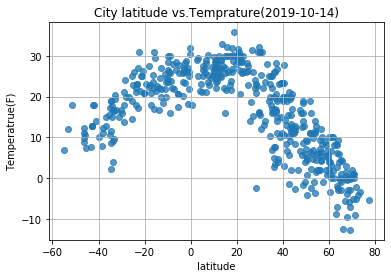

In [11]:
plt.scatter(city_data["Lat"], city_data["Max Temp"], marker="o", alpha=0.75)
plt.title("City latitude vs.Temprature(" + tDate +")")
plt.xlabel("latitude")
plt.ylabel("Temperatrue(F)")
plt.grid(True)
plt.savefig("../Images/Tmp.png")
plt.show()

#### Latitude vs. Humidity Plot

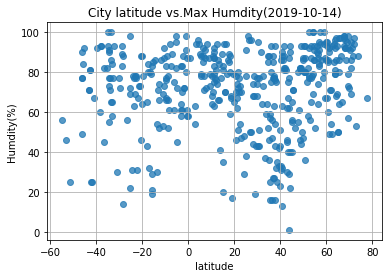

In [12]:
plt.scatter(city_data["Lat"], city_data["Humidity"], marker="o", alpha=0.75)
plt.title("City latitude vs.Max Humdity(" + tDate +")")
plt.xlabel("latitude")
plt.ylabel("Humdity(%)")
plt.grid(True)
plt.savefig("../Images/Humidty.png")
plt.show()

#### Latitude vs. Cloudiness Plot

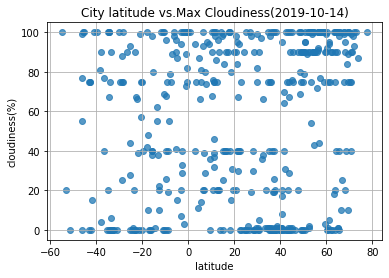

In [13]:
plt.scatter(city_data["Lat"], city_data["Cloudiness"], marker="o", alpha=0.75)
plt.title("City latitude vs.Max Cloudiness(" + tDate +")")
plt.xlabel("latitude")
plt.ylabel("cloudiness(%)")
plt.grid(True)
plt.savefig("../Images/Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

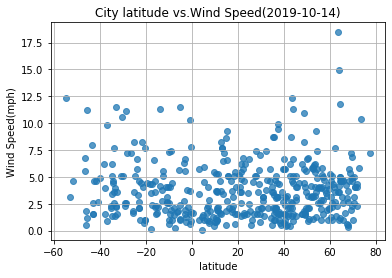

In [14]:
plt.scatter(city_data["Lat"], city_data["Wind Speed"], marker="o", alpha=0.75)
plt.title("City latitude vs.Wind Speed(" + tDate +")")
plt.xlabel("latitude")
plt.ylabel("Wind Speed(mph)")
plt.grid(True)
plt.savefig("../Images/WindSpeed.png")
plt.show()